In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

from unidecode import unidecode

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from listes import *

In [2]:
from mydataviz import *

In [3]:
# Chargement du dataset complet (317661, 28)
#data = pd.read_csv('./data/data_clean.csv', low_memory=False)

In [4]:
# Création d'un extrait du dataset pour charger et expérimenter plus rapidement
#data_petit = data.iloc[np.random.randint(0, len(data), 50000)]
#data_petit.to_csv("./data/data_clean_petit.csv")

In [5]:
# Chargement du dataset version réduite (50000 valeurs pour les tests)
data = pd.read_csv("./data/data_clean_petit.csv", low_memory=False)

In [6]:
data.loc[data['carbohydrates_100g']<0] = 0
data.loc[data['fat_100g']<0] = 0

In [7]:
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [8]:
listeColFloat = data.dtypes[data.dtypes != 'object'].index.tolist()
if 'code' in listeColFloat : listeColFloat.remove('code')

In [9]:
nomColonnes = {'fat_100g':'Lipides', 'saturated-fat_100g':'Graisses saturées', 'energy_100g':'Energie',
              'carbohydrates_100g':'Glucides', 'sugars_100g':'Sucres', 'proteins_100g':'Protéines',
              'nutrition-score-fr_100g':'Nutriscore', 'omega-3-fat_100g':'Omega3', 'fiber_100g':'Fibres',
              'salt_100g':'Sel', 'sodium_100g':'Sodium', 'fruits-vegetables-nuts_100g':'Fruits, legumes et noix',
              'additives_n':"Nombre d'additifs", 'ingredients_from_palm_oil_n':"Nombre d'ingrédients palmiques",
              'ingredients_that_may_be_from_palm_oil_n':"Nombre d'ingrédients possiblement palmiques",
              'nutrition_grade_fr':'Classement Nutriscore', 'categories':'Catégorie'}

In [10]:
print("Fichier de dimension " + str(data.shape) + " :\n")

print("\n\nType des colonnes :")
print(data.dtypes.to_markdown())

print("\n\nTaux de remplissage (%) :")
print(((1- data.isna().mean())*100).to_markdown())

print("\n\nNombre de valeurs uniques par colones :")
print(data.nunique().to_markdown())

Fichier de dimension (317661, 27) :



Type des colonnes :
|                                            | 0       |
|:-------------------------------------------|:--------|
| code                                       | int64   |
| product_name                               | object  |
| image_url                                  | object  |
| categories                                 | object  |
| ingredients_text                           | object  |
| additives_n                                | float64 |
| additives                                  | object  |
| additives_tags                             | object  |
| ingredients_from_palm_oil_n                | float64 |
| ingredients_from_palm_oil_tags             | object  |
| ingredients_that_may_be_from_palm_oil_n    | float64 |
| ingredients_that_may_be_from_palm_oil_tags | object  |
| nutrition_grade_fr                         | object  |
| energy_100g                                | float64 |
| fat_100g                   

<AxesSubplot: >

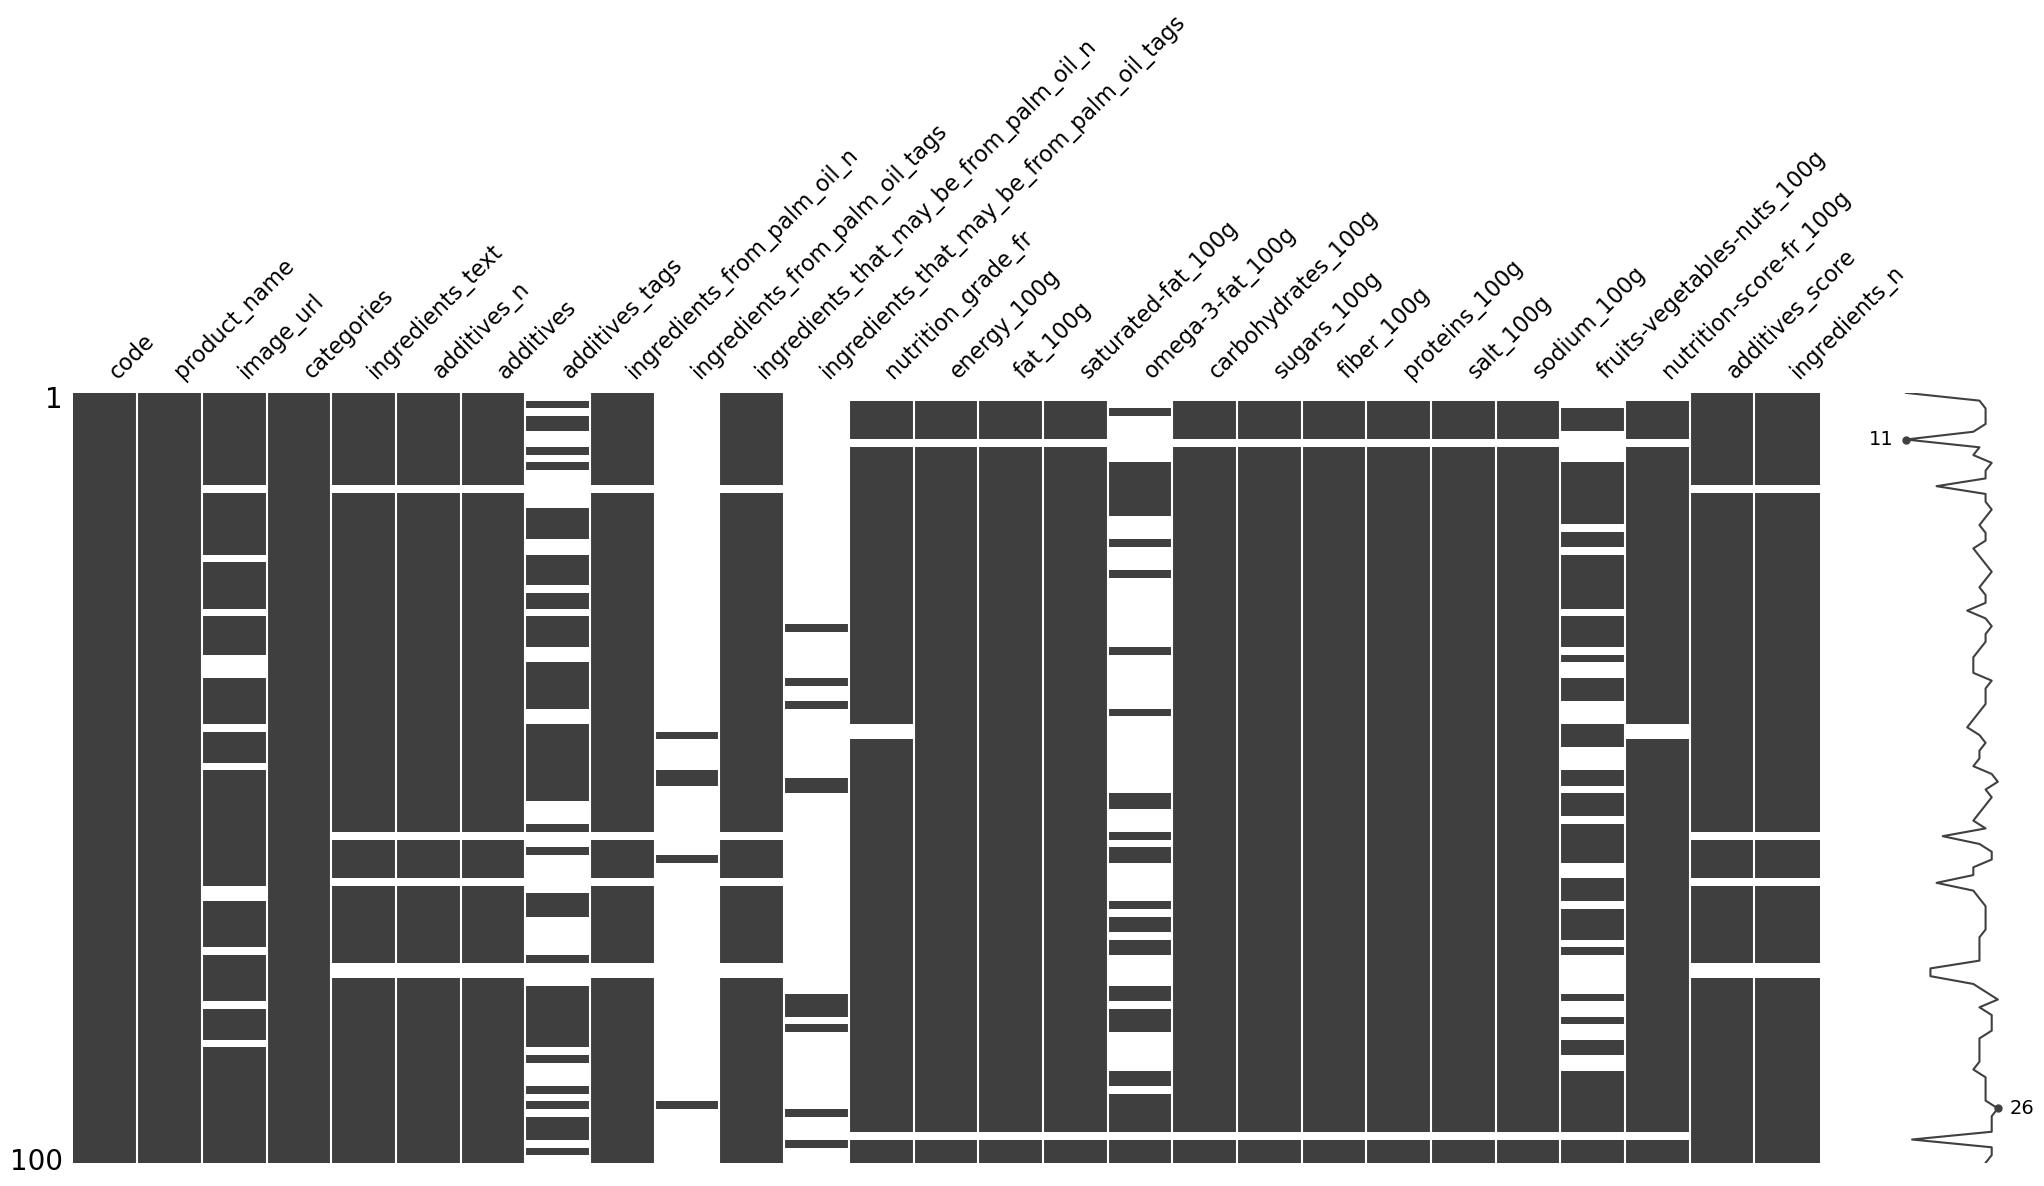

In [11]:
msno.matrix(data[:100])

# Univarié

In [12]:
txt = ' '.join(data['product_name'].astype(str).fillna(''))

In [13]:
tmp = DataSet.make_dataset(txt, 'txt')

In [14]:
wc = tmp.normalise().wordcloud(stopwords=STOPWORDS, width=900, height=600, max_font_size=120, background_color="white")

In [15]:
sns.set(rc={"figure.figsize":(18, 12)})

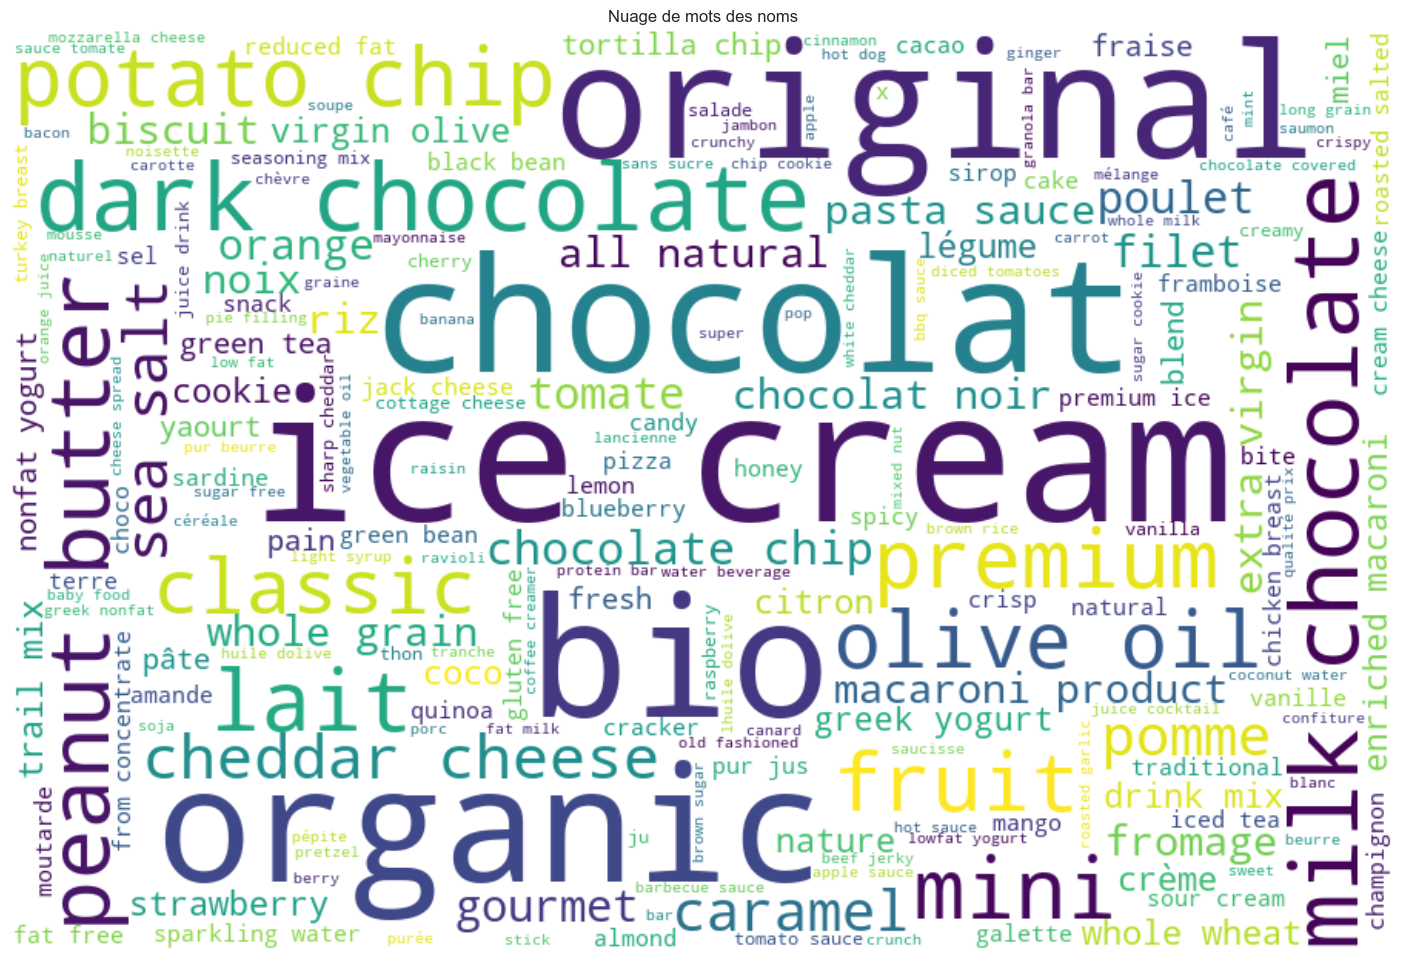

In [16]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots des noms")
plt.show()

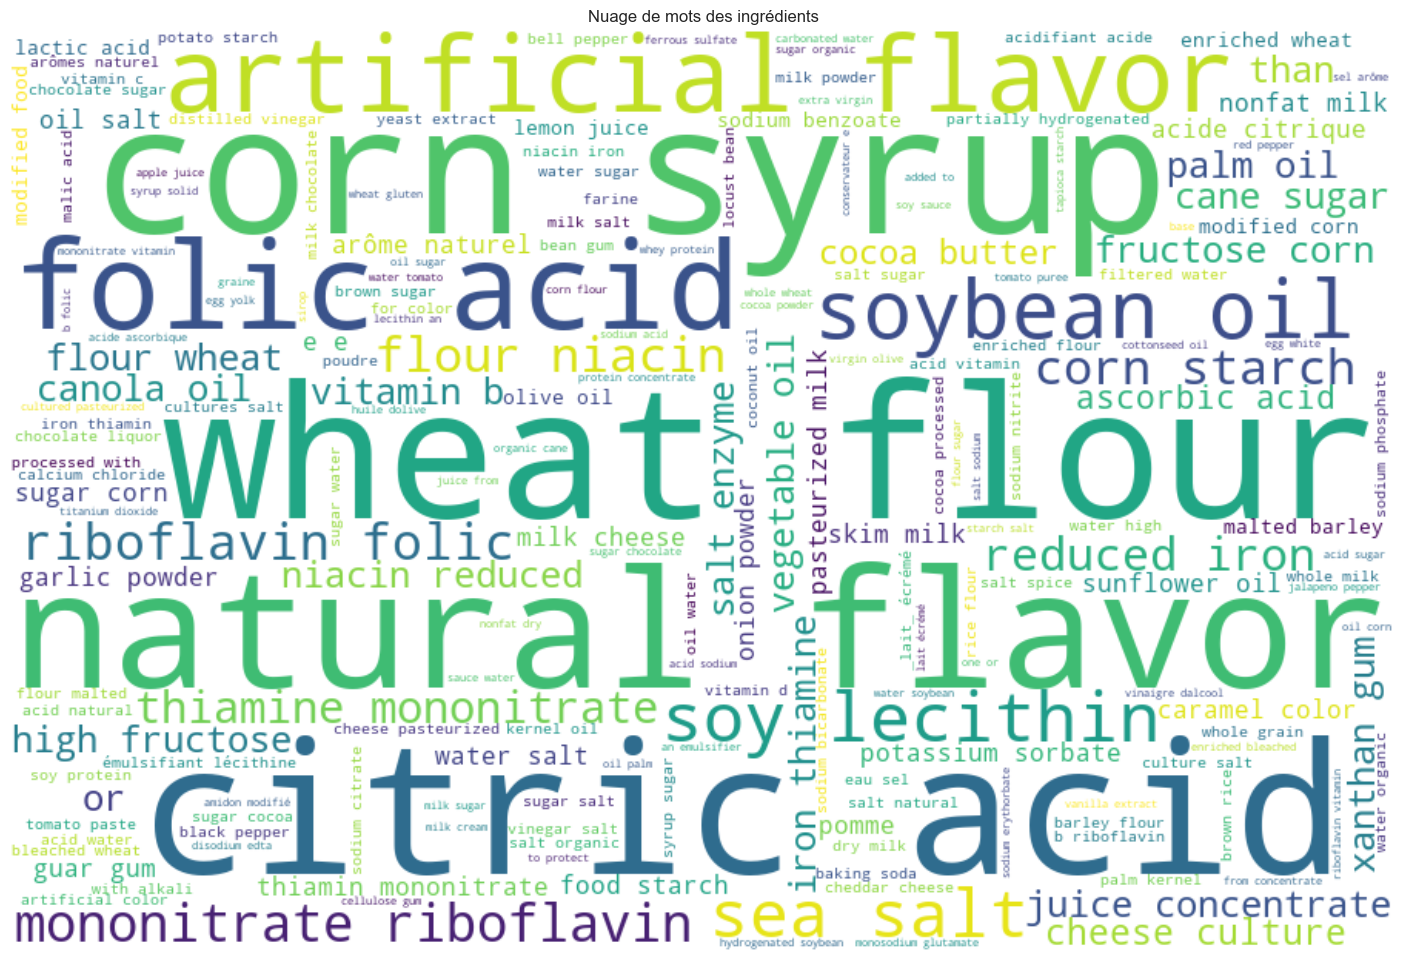

In [17]:
txt = ' '.join(data['ingredients_text'].astype(str).fillna(''))

tmp = DataSet.make_dataset(txt, 'txt')

wc = tmp.normalise().wordcloud(stopwords=STOPWORDS, width=900, height=600, max_font_size=120, background_color="white")

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots des ingrédients")
plt.show()

In [18]:
data['categories'].value_counts()[:10]

One-dish meals           5540
Sweets                   4675
Biscuits and cakes       4535
Non-sugared beverages    4289
Cereals                  4102
Cheese                   4019
Dressings and sauces     3596
Milk and yogurt          3293
Processed meat           3246
Chocolate products       3107
Name: categories, dtype: int64

In [19]:
tmp = data['categories'].value_counts()[:30]

In [20]:
def plot_piechart(data, limit=None):
    tmp = data.value_counts()
    
    if limit is not None:
        tmp = tmp[:limit]

    palette_color = sns.color_palette('bright')

    # plotting data on chart
    plt.pie(tmp.values, labels=tmp.index, colors=palette_color, autopct='%.0f%%')

    # displaying chart
    plt.show()


def plot_barchartcat(data, limit=None):
    tmp = data.value_counts()
    
    if limit is not None:
        tmp = tmp[:limit]

    print(tmp.values)
    print(list(tmp.index))
    sns.displot(tmp.values, x=list(tmp.index), kind="hist")

In [21]:
sns.set(rc={"figure.figsize":(10, 6)})

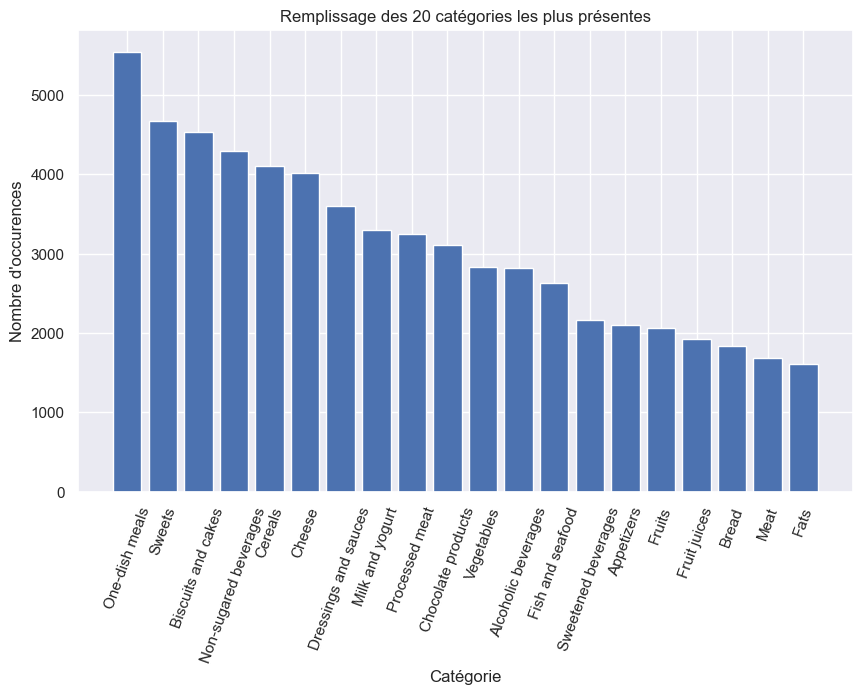

In [22]:
tmp = data['categories'].value_counts()[:20]

plt.bar(list(tmp.index), tmp.values)

plt.xticks(rotation=70)

plt.title("Remplissage des {} catégories les plus présentes".format(len(tmp)))
plt.ylabel("Nombre d'occurences")
plt.xlabel("Catégorie")

plt.show()

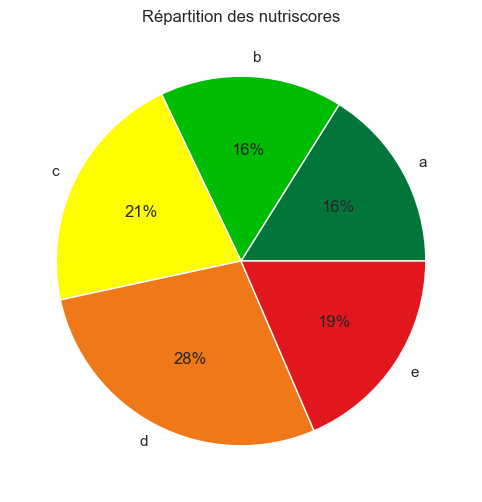

In [23]:
tmp = data['nutrition_grade_fr'].value_counts()

tmp = tmp.reindex(['a', 'b', 'c', 'd', 'e'])


palette_color = sns.color_palette('bright')

plt.pie(tmp.values, labels=tmp.index, colors=['#02753a', '#00bc02', '#fffe00', '#ef7819', '#e2161d'], autopct='%.0f%%')
plt.title("Répartition des nutriscores")
plt.show()

In [24]:
tmp = data['additives_tags'].str.split(',', expand = True).stack().str.replace('en:', '')
tmp

1       0    e967
3       0    e290
        1    e330
4       0    e330
7       0    e621
             ... 
317654  6    e412
317657  0    e952
        1    e330
        2    e200
        3    e957
Length: 476992, dtype: object

In [25]:
#tmp = data['nutrition_grade_fr']

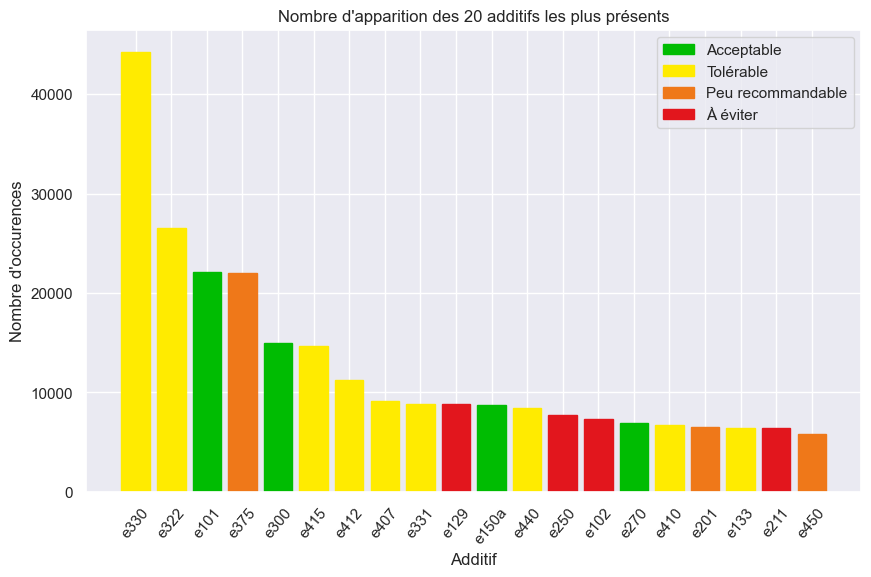

In [26]:
tmp = data['additives_tags'].str.split(',', expand = True).stack().str.replace('en:', '')

tmp = tmp.value_counts()[:20]


bars = plt.bar(list(tmp.index), tmp.values)
plt.xticks(rotation=50)

couleurAdditifs = ['', '#00bc02', '#FFEB00', '#ef7819', '#e2161d']
for i, bar in enumerate(bars):
    a = tmp.index[i]
    if a not in listeAdditifs:
        a = 'e666'
    bar.set_color(couleurAdditifs[listeAdditifs[a]])

plt.title("Nombre d'apparition des {} additifs les plus présents".format(len(tmp)))
plt.ylabel("Nombre d'occurences")
plt.xlabel("Additif")

handles = [plt.Rectangle((0,0),1,1, color=c) for c in ['#00bc02', '#FFEB00', '#ef7819', '#e2161d']]
plt.legend(handles, ['Acceptable', 'Tolérable', 'Peu recommandable', 'À éviter'])

plt.show()

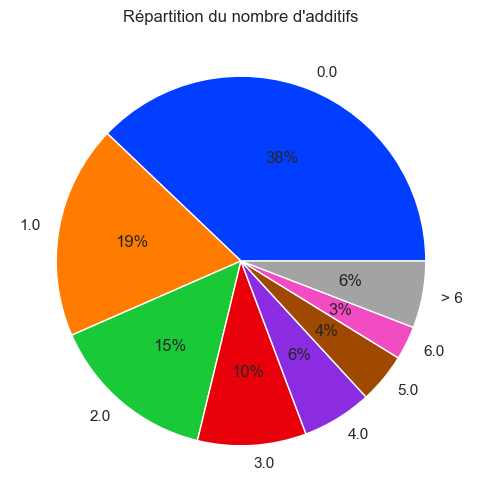

In [27]:
limit = 6

tmp = data['additives_n'].value_counts()

s = sum(tmp[limit+1:])
tmp = tmp[:limit]
tmp['> '+str(limit)] = s

palette_color = sns.color_palette('bright')

plt.pie(tmp.values, labels=tmp.index, colors=palette_color, autopct='%.0f%%')
plt.title("Répartition du nombre d'additifs")
plt.show()

In [28]:
sns.set(rc={"figure.figsize":(10, 20)})

In [29]:
df = data[['fat_100g', 'saturated-fat_100g', 'omega-3-fat_100g',
'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 
'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts_100g']]

[Text(0.5, 0, 'Valeur'),
 Text(0, 0.5, 'Catégorie'),
 Text(0.5, 1.0, 'Violon des valeurs des données nutritionelles')]

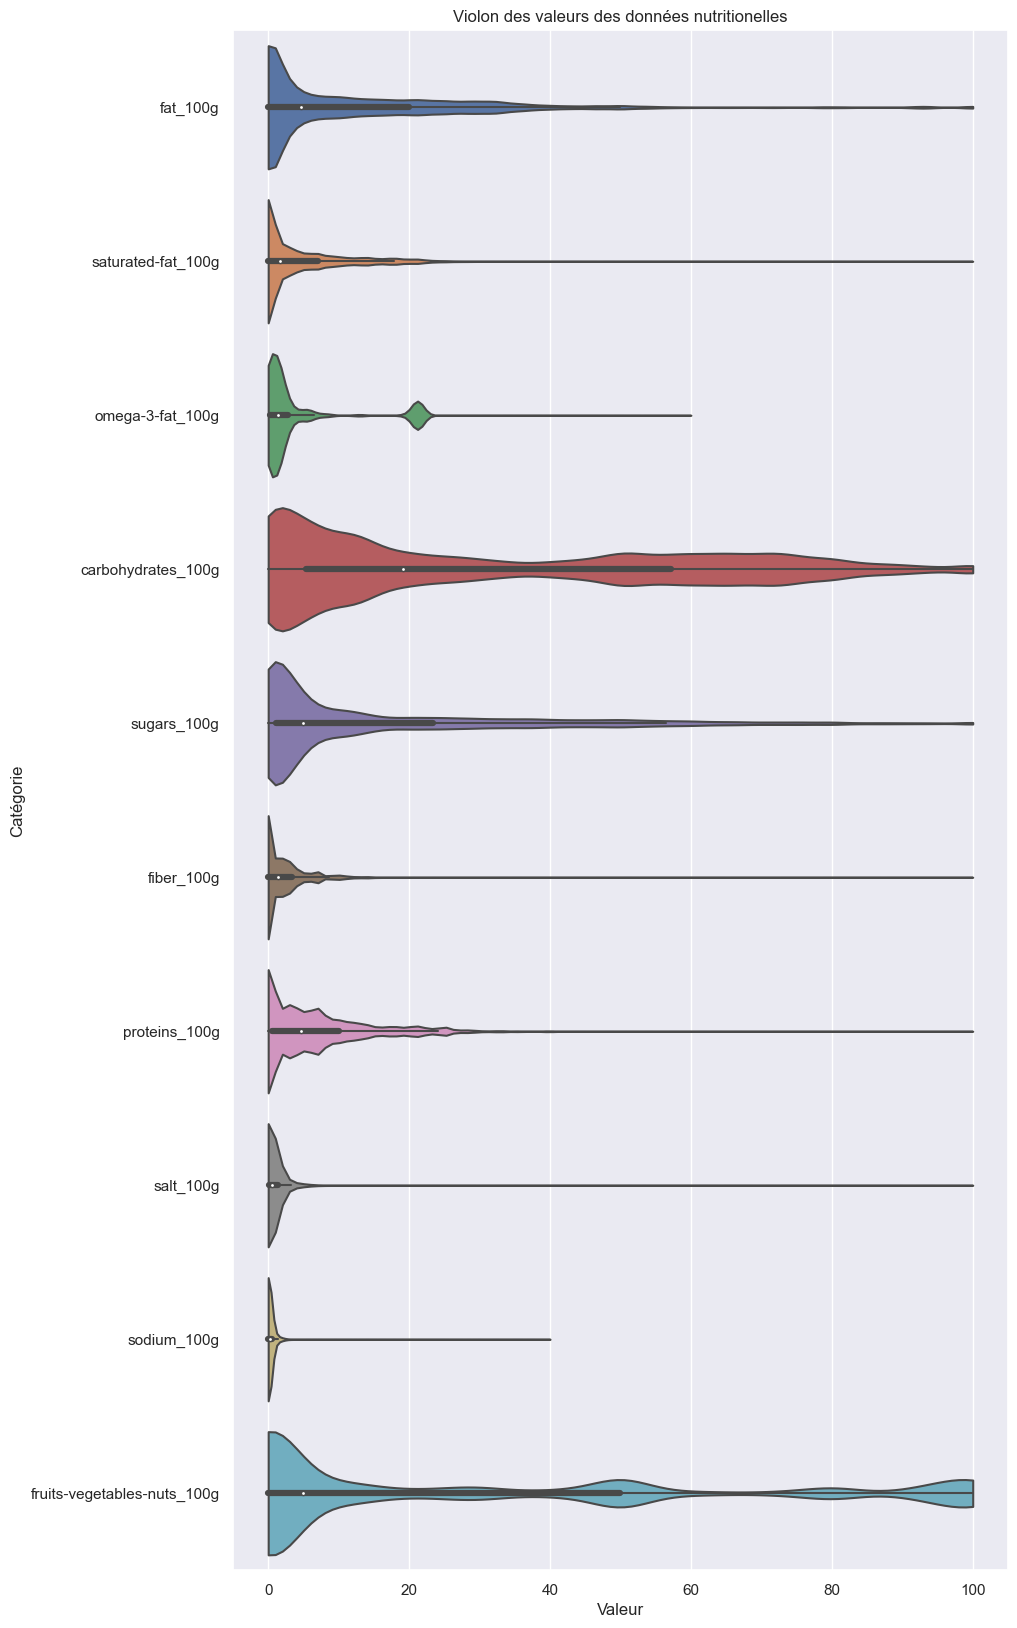

In [30]:
p = sns.violinplot(data=df, orient='h', scale='width', cut=0)
p.set(xlabel ="Valeur", ylabel = "Catégorie", title ='Violon des valeurs des données nutritionelles')

[Text(0.5, 0, 'Valeur'),
 Text(0, 0.5, 'Catégorie'),
 Text(0.5, 1.0, 'Boite a moustache des valeurs des données nutritionelles')]

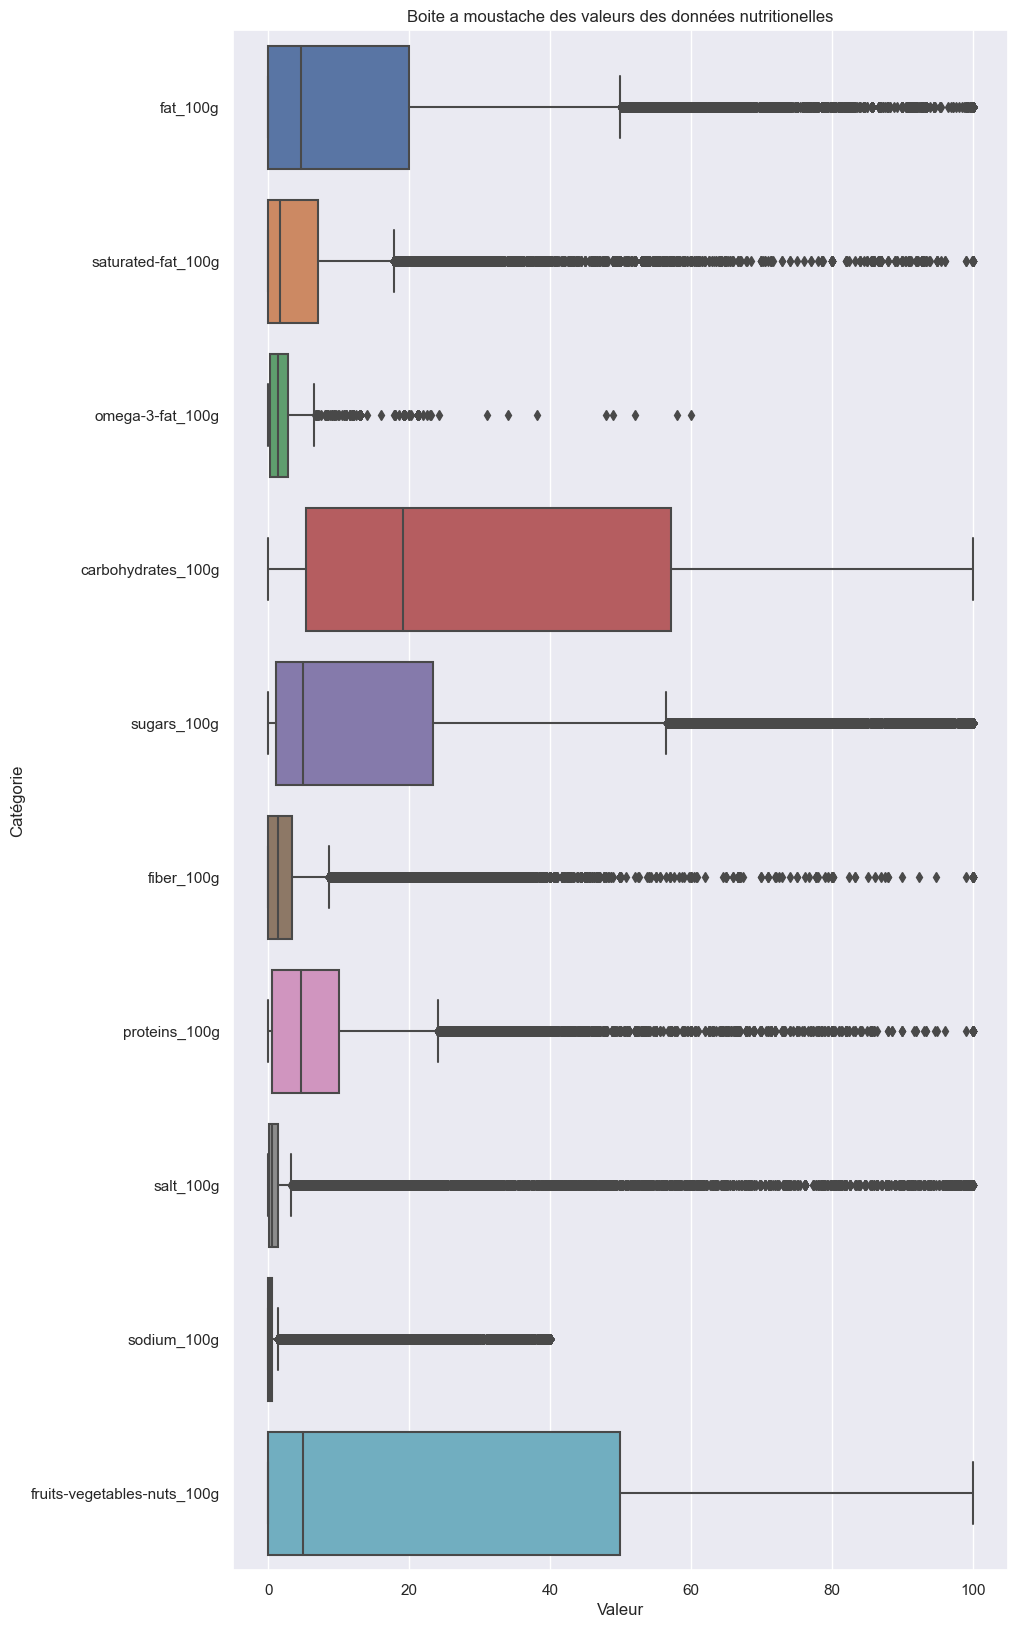

In [31]:
p = sns.boxplot(data=df, orient='h')
p.set(xlabel ="Valeur", ylabel = "Catégorie", title ='Boite a moustache des valeurs des données nutritionelles')

[Text(0.5, 0, 'Nutriscore'),
 Text(0, 0.5, 'Nombre de valeurs'),
 Text(0.5, 1.0, 'Répartition des nutriscores')]

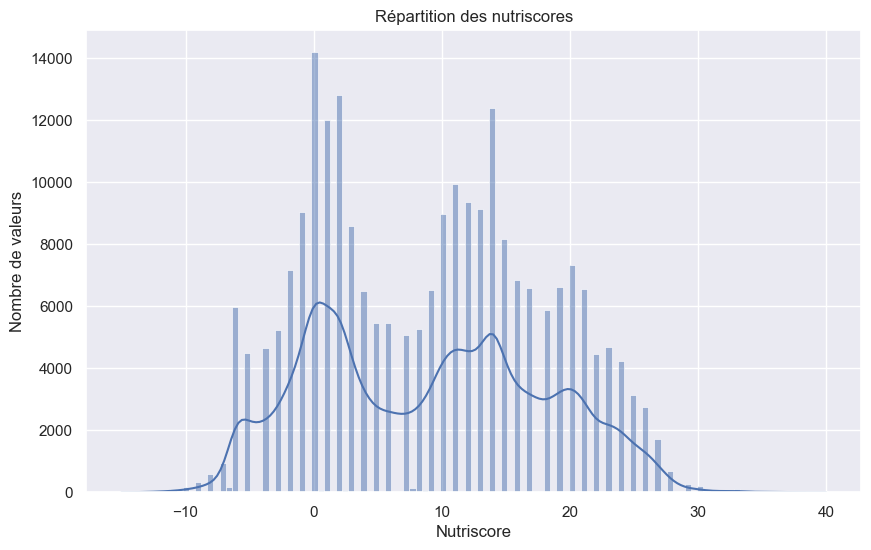

In [32]:
sns.set(rc={"figure.figsize":(10, 6)})
p = sns.histplot(data=data['nutrition-score-fr_100g'], kde=True)
p.set(xlabel ="Nutriscore", ylabel = "Nombre de valeurs", title ='Répartition des nutriscores')

# Bivariée

In [33]:
%matplotlib inline
sns.set(rc={"figure.figsize":(8, 6)})

In [34]:
@interact
def show_articles_more_than(x=widgets.Dropdown(options=listeColFloat, value='fat_100g'),
                            y=widgets.Dropdown(options=listeColFloat, value='saturated-fat_100g'), 
                            couleur=widgets.Dropdown(options=listeColFloat, value='energy_100g')):
    fig = plt.figure()
    ax = plt.axes()

    ax.scatter(data[x], data[y], c=data[couleur], alpha=0.3)

    ax.set_title('3d Scatter plot geeks for geeks')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    plt.show()

interactive(children=(Dropdown(description='x', index=4, options=('additives_n', 'ingredients_from_palm_oil_n'…

In [35]:
listeScatter = pd.DataFrame([['fat_100g', 'saturated-fat_100g', 'energy_100g', None],
                             ['carbohydrates_100g', 'sugars_100g', 'energy_100g', None],
                             ['fat_100g', 'proteins_100g', 'energy_100g', None],
                             ['fat_100g', 'proteins_100g', 'nutrition-score-fr_100g', None],
                             ['proteins_100g', 'carbohydrates_100g', 'nutrition-score-fr_100g', None],
                             ['fat_100g', 'carbohydrates_100g', 'nutrition-score-fr_100g', None],
                             ['salt_100g', 'sodium_100g', '', None],
                             ['nutrition-score-fr_100g', 'energy_100g', '', None]], columns=['x', 'y', 'c', 'title'])

listeScatter['title'] = listeScatter['x'] + ' * ' + listeScatter['y'] + ' - ' + listeScatter['c']

listeInteract = []

for i in listeScatter.index:
    listeInteract += [(listeScatter.loc[i, 'title'], i)]

In [36]:
@interact
def show_articles_more_than(graphique=widgets.Dropdown(options=listeInteract)):
    x = listeScatter.loc[graphique, 'x']
    y = listeScatter.loc[graphique, 'y']
    c = listeScatter.loc[graphique, 'c']
    if c != '':
        cNom = nomColonnes[c]
        c = data[c]
    else:
        cNom = ''
        c = 'b'
    t = listeScatter.loc[graphique, 'title']
    
    fig = plt.figure()
    ax = plt.axes()

    sc = ax.scatter(data[x], data[y], c=c, alpha=1)
    ax.scatter(data[x], data[y], c=c, alpha=0.3)

    ax.set_title(listeScatter.loc[graphique, 'title'])
    ax.set_xlabel(nomColonnes[x])
    ax.set_ylabel(nomColonnes[y])
    
    
    #legend
    if cNom != '':
        cb = fig.colorbar(sc, ax=ax)
        cb.set_label(cNom)
    
    
    plt.show()

interactive(children=(Dropdown(description='graphique', options=(('fat_100g * saturated-fat_100g - energy_100g…

In [37]:
%matplotlib notebook

<IPython.core.display.Javascript object>


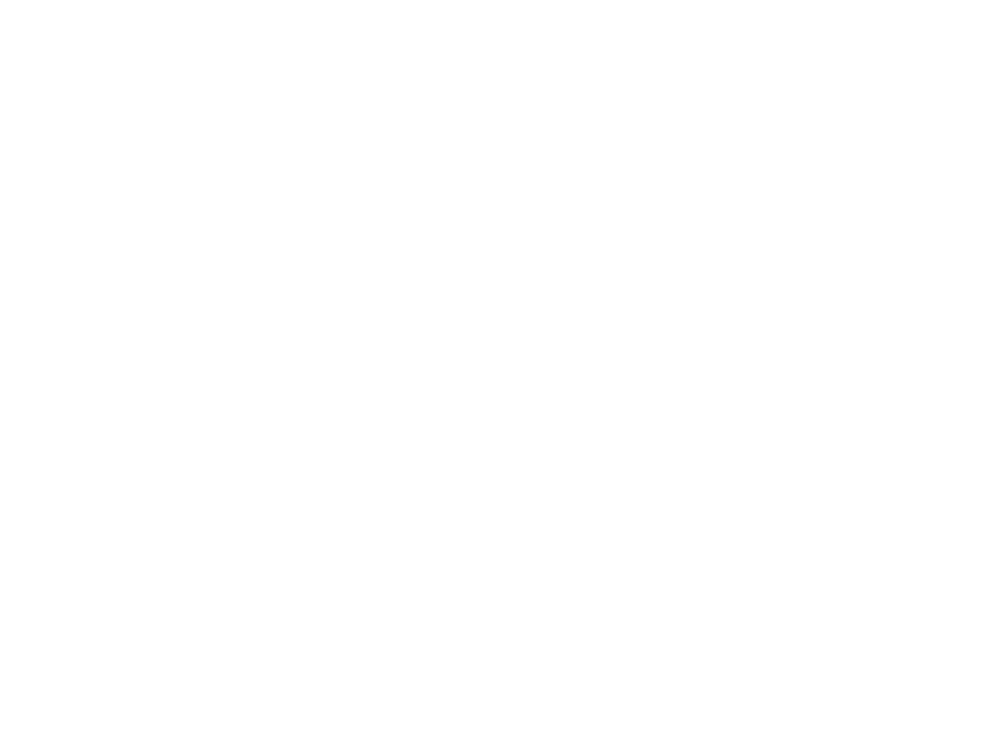

In [38]:
fig = plt.figure()
ax = plt.axes(projection="3d")

#energy_100g
sc = ax.scatter(data['fat_100g'], data['carbohydrates_100g'], data['proteins_100g'], c=data['nutrition-score-fr_100g'], alpha=1, s=0)
ax.scatter(data['fat_100g'], data['carbohydrates_100g'], data['proteins_100g'], c=data['nutrition-score-fr_100g'], alpha=0.1, s=7)

ax.set_title('3d Scatter plot geeks for geeks')
ax.set_xlabel('Lipides')
ax.set_ylabel('Glucides')
ax.set_zlabel('Proteines')

cb = fig.colorbar(sc, ax=ax)
cb.set_label('Nutriscore')

plt.show()

In [39]:
%matplotlib inline

In [40]:
listeColNum = listeColFloat.copy()

<AxesSubplot: >

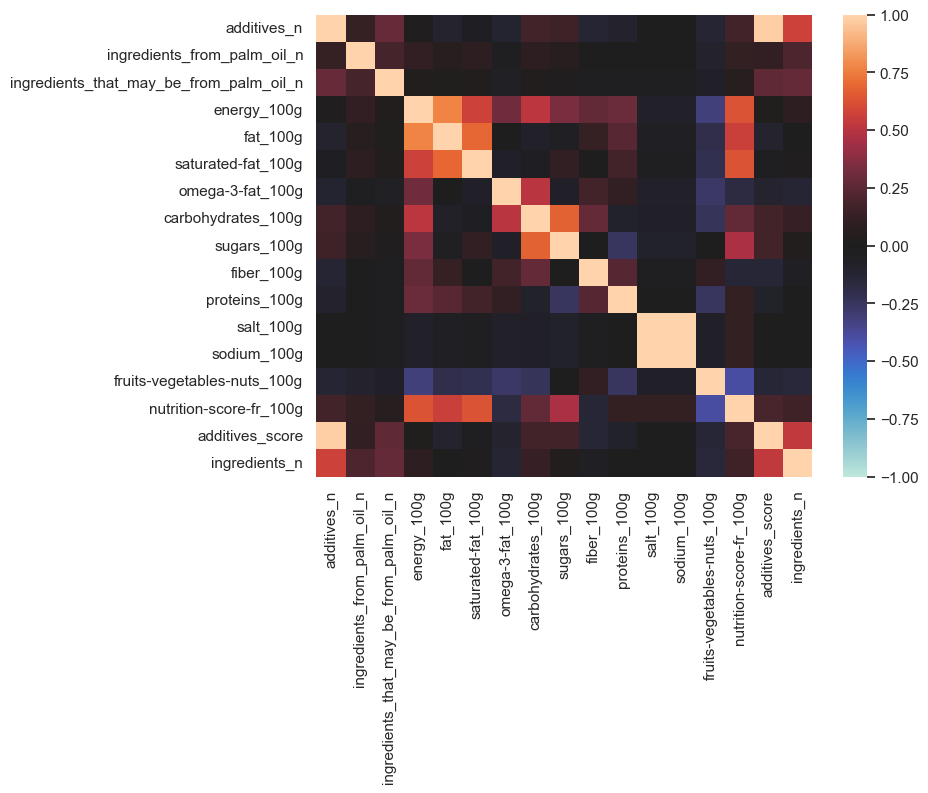

In [41]:
sns.heatmap(data[listeColNum].corr(), vmin=-1, vmax=1, center=0)

In [42]:
from sklearn import preprocessing

In [43]:
listeColNonFloat = [c for c in data.columns if c not in listeColFloat]

In [44]:
dataTmp = data.copy()

In [45]:
label_encoder = preprocessing.LabelEncoder()

In [46]:
for c in [c for c in data.columns if c not in listeColFloat]:
    dataTmp[c] = label_encoder.fit_transform(dataTmp[c].astype(str))

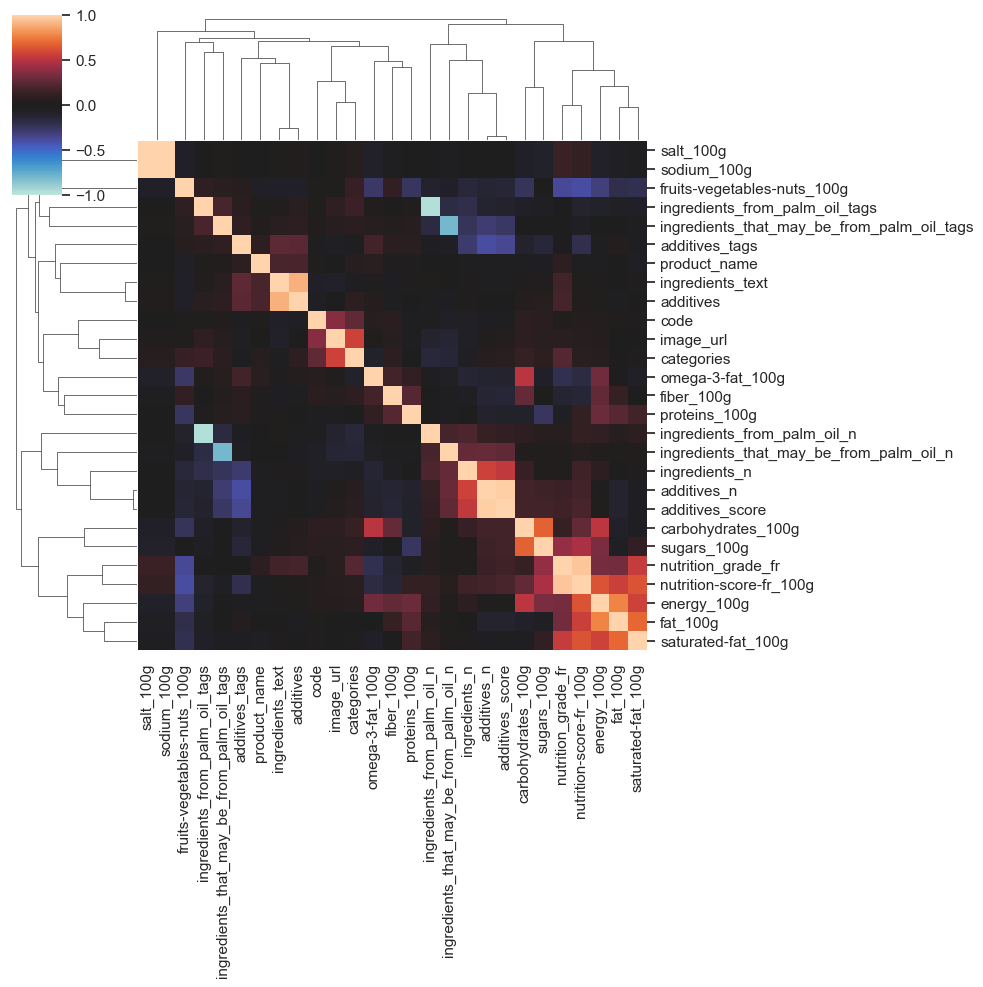

In [47]:
h = sns.clustermap(dataTmp.corr(), vmin=-1, vmax=1, center=0)

In [48]:
from scipy.cluster.hierarchy import dendrogram

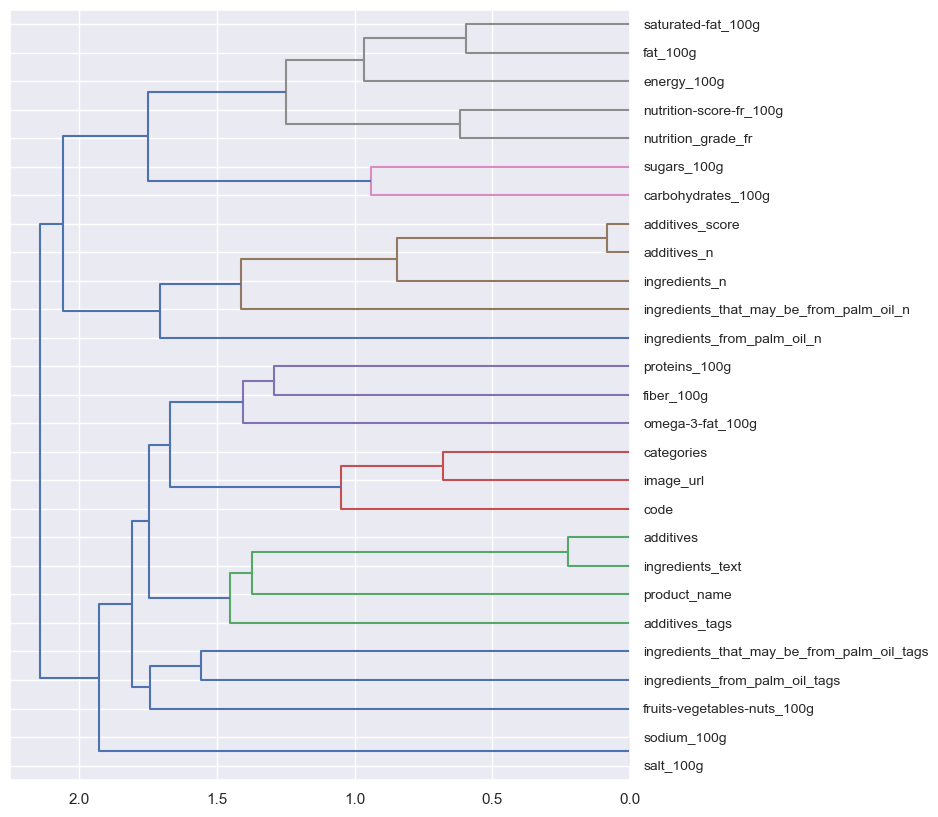

In [49]:
sns.set(rc={"figure.figsize":(8, 10)})
dendrogram(h.dendrogram_col.linkage, labels=dataTmp.columns, orientation='left');

In [50]:
%matplotlib inline

In [51]:
nbVals = 15

In [52]:
dataFrequent = data.loc[data["categories"].isin(data['categories'].value_counts()[:nbVals].index.to_list())]

In [53]:
sns.set(rc={"figure.figsize":(10, 12)})

In [54]:
@interact
def show_articles_more_than(x=widgets.Dropdown(options=listeColFloat, value='fat_100g')):
    #ax = sns.stripplot(data=dataFrequent, x=x, y="categories", hue="nutrition-score-fr_100g", orient='h', alpha=0.3)
    ax = sns.boxplot(data=dataFrequent, x=x, y="categories", orient='h')
    
    ax.set(xlabel=nomColonnes[x],
           ylabel='Catégorie',
           title='Boxplot des ' + nomColonnes[x] + ' pour les ' + str(nbVals) + ' catégories les plus fréquentes')
        
    listCat = [t.get_text()  for t in ax.get_yticklabels()]
    listTmp = []
    for n in listCat:
        nb = dataFrequent.loc[dataFrequent['categories']==n, x].notna().sum()
        listTmp += [(n, nb)]
    
    ax.set_yticklabels(["{} ({})".format(n, nb) for n, nb in listTmp])

    
    plt.show()

interactive(children=(Dropdown(description='x', index=4, options=('additives_n', 'ingredients_from_palm_oil_n'…

In [55]:
import plotly.graph_objects as go

In [56]:
listCat = data['categories'].value_counts()[:30]

In [57]:
col = ['fat_100g','carbohydrates_100g','proteins_100g']

In [58]:
listCat = ['One-dish meals', 'Fish and seafood', 'Legumes', 'Dairy desserts', 'Cheese']

In [59]:
fig = go.Figure()


m = 0
for cat in listCat:
    val = data.loc[data['categories']==cat, col].median()
    m = max(m, val.max())
    fig.add_trace(go.Scatterpolar(
          r=val.values,
          theta=col,
          fill='toself',
          name=cat
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, m]
    )),
  showlegend=True
)


fig.show()

In [60]:
sns.set(rc={"figure.figsize":(8, 6)})

In [61]:
y = 'additives_n'

In [62]:
tmp = data[[y, 'nutrition_grade_fr']].dropna()

In [63]:
tmp[y] = pd.qcut(tmp[y], 6, duplicates='drop')

In [64]:
tmp['nutrition_grade_fr'] = pd.Categorical(tmp['nutrition_grade_fr'], ['a', 'b', 'c', 'd', 'e', 'f'])

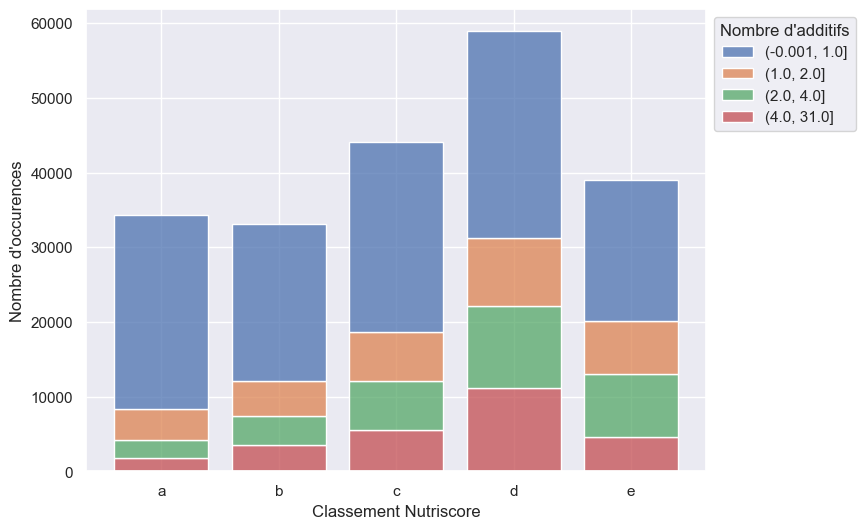

In [65]:
ax = sns.histplot(tmp, x='nutrition_grade_fr', hue=y,
             multiple='stack', shrink=0.8)

ax.set_xlabel(nomColonnes['nutrition_grade_fr'])
ax.set_ylabel("Nombre d'occurences")
    
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
legend.set_title(nomColonnes[y])

In [66]:
sns.set(rc={"figure.figsize":(8, 6)})

In [67]:
dataHeatmap = data.loc[data['categories'].isin(data['categories'].value_counts()[:10].index)]

In [68]:
dataHeatmap = dataHeatmap[['nutrition_grade_fr', 'categories']]

In [69]:
dataHeatmap['val'] = 1

In [70]:
dataHeatmap = dataHeatmap.pivot_table(values='val',index='categories',columns='nutrition_grade_fr',aggfunc=np.sum)

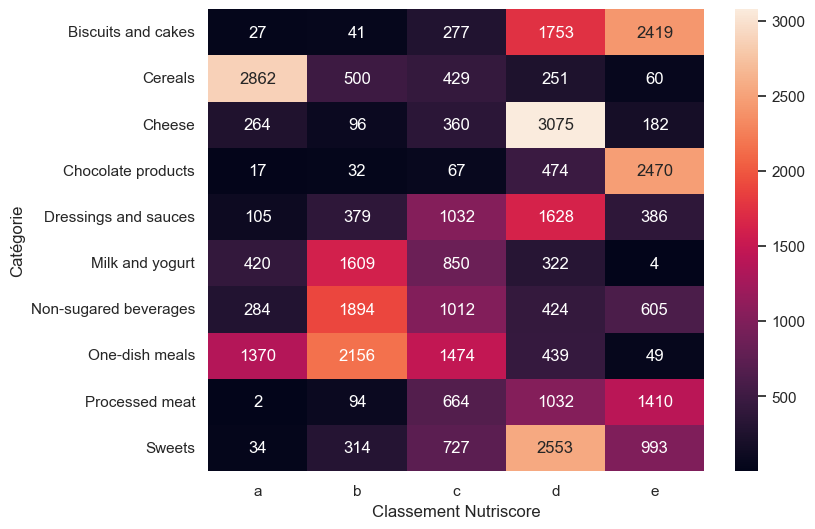

In [71]:
ax = sns.heatmap(dataHeatmap,annot=True, fmt='1.0f')

plt.xticks(rotation=0)
plt.yticks(rotation=0)

ax.set_xlabel(nomColonnes['nutrition_grade_fr'])
ax.set_ylabel(nomColonnes['categories'])

plt.show()

# ACP

In [72]:
sns.set(rc={"figure.figsize":(10, 6)})

In [73]:
from sklearn.decomposition import PCA, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

In [74]:
scaler = StandardScaler()

In [75]:
listeColNum = listeColFloat.copy()

In [76]:
listeColNum.remove('sodium_100g')
#listeColNum.remove('sugars_100g')
listeColNum.remove('omega-3-fat_100g')
#listeColNum.remove('saturated-fat_100g')
listeColNum.remove('additives_n')
listeColNum.remove('ingredients_from_palm_oil_n')
listeColNum.remove('ingredients_that_may_be_from_palm_oil_n')
listeColNum.remove('fruits-vegetables-nuts_100g')
listeColNum

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'nutrition-score-fr_100g',
 'additives_score',
 'ingredients_n']

In [77]:
dataPCA = data[listeColNum]

In [78]:
dataPCA = SimpleImputer(missing_values=np.nan, strategy='mean').fit(dataPCA).transform(dataPCA)

In [79]:
X_scaled = scaler.fit_transform(dataPCA)

In [80]:
pd.DataFrame(X_scaled).describe().round(2)

0          1          2          3          4          5   \
count  317661.00  317661.00  317661.00  317661.00  317661.00  317661.00   
mean       -0.00       0.00      -0.00       0.00       0.00       0.00   
std         1.00       1.00       1.00       1.00       1.00       1.00   
min        -1.49      -0.79      -0.72      -1.18      -0.81      -0.69   
25%        -0.90      -0.76      -0.70      -0.91      -0.71      -0.69   
50%         0.00      -0.16      -0.18       0.00      -0.31      -0.03   
75%         0.65       0.22       0.00       0.75       0.06       0.00   
max         3.61       5.53      13.74       2.61       4.40      25.69   

              6          7          8          9          10  
count  317661.00  317661.00  317661.00  317661.00  317661.00  
mean        0.00      -0.00       0.00       0.00       0.00  
std         1.00       1.00       1.00       1.00       1.00  
min        -0.92      -0.27      -3.06      -0.83      -1.22  
25%        -0.78      -0.25      -0.76      -0.83      -0.65  
50%        -0.12      -0.13       0.00      -0.06       0.00  
75%         0.24      -0.00       0.64       0.13       0.29  
max        12.28      16.78       3.96      13.44      25.96

In [81]:
n_components = 6

In [82]:
pca = PCA(n_components=n_components)

In [83]:
pca.fit(X_scaled)

PCA(n_components=6)

In [84]:
(pca.explained_variance_ratio_*100).round(2)

array([27.73, 17.97, 13.38, 11.35,  9.16,  6.42])

In [85]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = listeColNum
pcs.index = [f"F{i}" for i in range(1, n_components+1)]


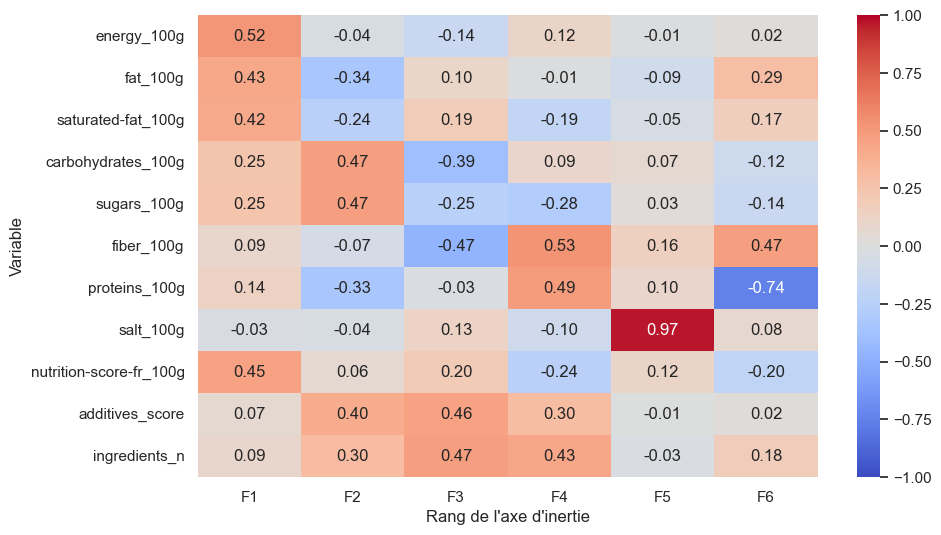

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

ax.set_xlabel("Rang de l'axe d'inertie")
ax.set_ylabel("Variable")
plt.show()

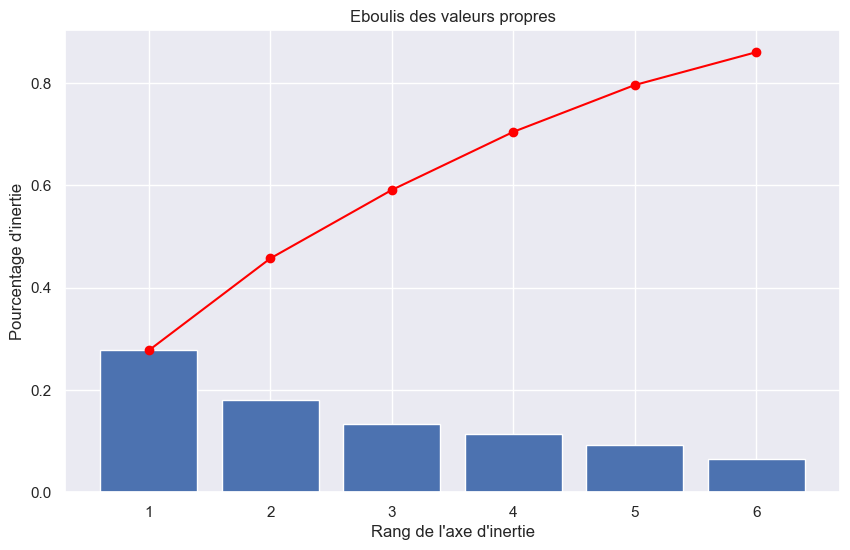

In [87]:
plt.bar(range(1, n_components+1), pca.explained_variance_ratio_)
plt.plot(range(1, n_components+1), pca.explained_variance_ratio_.cumsum(),c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [88]:
x, y = 0,1
#x, y = 2,3

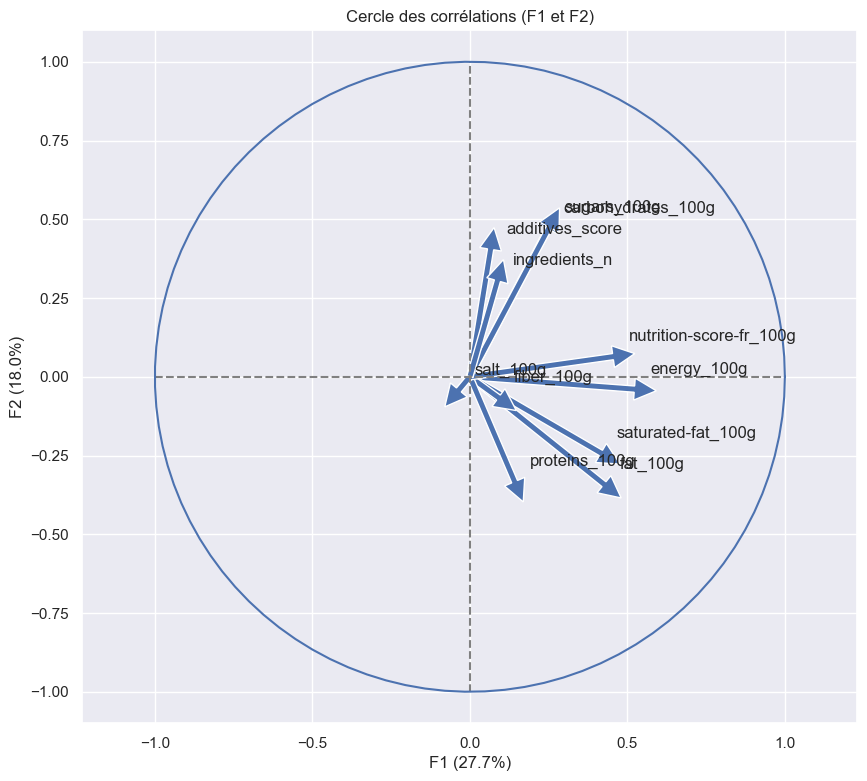

In [89]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[x, i],  #0 for PC1
             pca.components_[y, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[x, i] + 0.05,
             pca.components_[y, i] + 0.05,
             listeColNum[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [90]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                s=10,
                                figsize=[10,8], 
                                marker="."):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, alpha=alpha, s=s)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

In [91]:
X_proj = pca.transform(X_scaled)

In [92]:
x_y = [0, 1]
#x_y = [2, 3]

@interact
def show_articles_more_than(x=widgets.Dropdown(options=listeColFloat, value='fat_100g')):
    
    display_factorial_planes(X_proj, x_y, clusters=data[x], alpha=0.3, s=4)

interactive(children=(Dropdown(description='x', index=4, options=('additives_n', 'ingredients_from_palm_oil_n'…

In [93]:
import random

In [94]:
listRandom = random.sample(range(len(data)), 50)

@interact#_manual
def show_articles_more_than(nb=(0,30), resample=False):
    if resample:
        global listRandom
        listRandom = random.sample(range(len(data)), 50)
        
    r = listRandom[:nb]
    tmp = data.iloc[r].fillna('NaN')['product_name'].values
    display_factorial_planes(X_proj[r], x_y, pca, figsize=(15,11), labels=tmp, marker="o", s=100)

interactive(children=(IntSlider(value=15, description='nb', max=30), Checkbox(value=False, description='resamp…

# ANOVA

In [95]:
import pingouin as pg

In [96]:
pg.pairwise_corr(data, columns=listeColNum, method='pearson')

X                        Y   method alternative  \
0               energy_100g                 fat_100g  pearson   two-sided   
1               energy_100g       saturated-fat_100g  pearson   two-sided   
2               energy_100g       carbohydrates_100g  pearson   two-sided   
3               energy_100g              sugars_100g  pearson   two-sided   
4               energy_100g               fiber_100g  pearson   two-sided   
5               energy_100g            proteins_100g  pearson   two-sided   
6               energy_100g                salt_100g  pearson   two-sided   
7               energy_100g  nutrition-score-fr_100g  pearson   two-sided   
8               energy_100g          additives_score  pearson   two-sided   
9               energy_100g            ingredients_n  pearson   two-sided   
10                 fat_100g       saturated-fat_100g  pearson   two-sided   
11                 fat_100g       carbohydrates_100g  pearson   two-sided   
12                 fat_100g              sugars_100g  pearson   two-sided   
13                 fat_100g               fiber_100g  pearson   two-sided   
14                 fat_100g            proteins_100g  pearson   two-sided   
15                 fat_100g                salt_100g  pearson   two-sided   
16                 fat_100g  nutrition-score-fr_100g  pearson   two-sided   
17                 fat_100g          additives_score  pearson   two-sided   
18                 fat_100g            ingredients_n  pearson   two-sided   
19       saturated-fat_100g       carbohydrates_100g  pearson   two-sided   
20       saturated-fat_100g              sugars_100g  pearson   two-sided   
21       saturated-fat_100g               fiber_100g  pearson   two-sided   
22       saturated-fat_100g            proteins_100g  pearson   two-sided   
23       saturated-fat_100g                salt_100g  pearson   two-sided   
24       saturated-fat_100g  nutrition-score-fr_100g  pearson   two-sided   
25       saturated-fat_100g          additives_score  pearson   two-sided   
26       saturated-fat_100g            ingredients_n  pearson   two-sided   
27       carbohydrates_100g              sugars_100g  pearson   two-sided   
28       carbohydrates_100g               fiber_100g  pearson   two-sided   
29       carbohydrates_100g            proteins_100g  pearson   two-sided   
30       carbohydrates_100g                salt_100g  pearson   two-sided   
31       carbohydrates_100g  nutrition-score-fr_100g  pearson   two-sided   
32       carbohydrates_100g          additives_score  pearson   two-sided   
33       carbohydrates_100g            ingredients_n  pearson   two-sided   
34              sugars_100g               fiber_100g  pearson   two-sided   
35              sugars_100g            proteins_100g  pearson   two-sided   
36              sugars_100g                salt_100g  pearson   two-sided   
37              sugars_100g  nutrition-score-fr_100g  pearson   two-sided   
38              sugars_100g          additives_score  pearson   two-sided   
39              sugars_100g            ingredients_n  pearson   two-sided   
40               fiber_100g            proteins_100g  pearson   two-sided   
41               fiber_100g                salt_100g  pearson   two-sided   
42               fiber_100g  nutrition-score-fr_100g  pearson   two-sided   
43               fiber_100g          additives_score  pearson   two-sided   
44               fiber_100g            ingredients_n  pearson   two-sided   
45            proteins_100g                salt_100g  pearson   two-sided   
46            proteins_100g  nutrition-score-fr_100g  pearson   two-sided   
47            proteins_100g          additives_score  pearson   two-sided   
48            proteins_100g            ingredients_n  pearson   two-sided   
49                salt_100g  nutrition-score-fr_100g  pearson   two-sided   
50                salt_100g          additives_score  pearson   two-sided   
51                salt

In [97]:

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [98]:
dataANOVA = data[['additives_n', 'categories', 'nutrition-score-fr_100g', 'salt_100g']].copy()

In [99]:
# Fausses valeurs pour nombre d'additifs
#dataANOVA['additives_n'] = [max(0, int(random.gauss(2, 5))) for _ in range(len(dataANOVA))]

In [100]:
# Fausses valeurs pour nutriscore
#dataANOVA['nutrition-score-fr_100g'] = [max(-14, int(random.gauss(0, 10))) for _ in range(len(dataANOVA))]

In [101]:
dataANOVA = dataANOVA.dropna()
dataANOVA['additives_n'] = pd.qcut(dataANOVA['additives_n'], 8, duplicates='drop')
dataANOVA = dataANOVA.loc[dataANOVA['categories'].isin(dataANOVA['categories'].value_counts()[:6].index)]
dataANOVA['nutriscore'] = dataANOVA['nutrition-score-fr_100g']

In [102]:
Y, x1, x2 = 'nutrition-score-fr_100g', 'additives_n', 'categories'

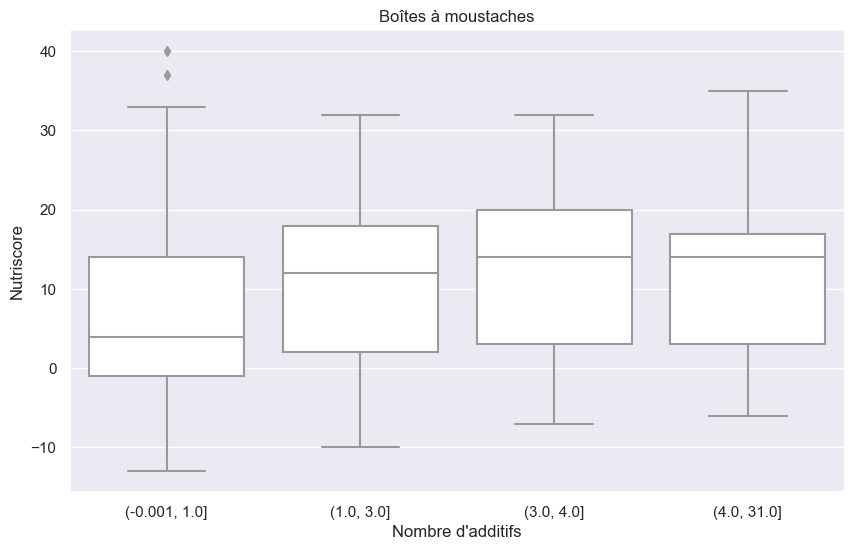

In [103]:
ax = sns.boxplot(x=x1, y=Y, data=dataANOVA, color='white')
plt.xlabel(nomColonnes[x1])
plt.ylabel(nomColonnes[Y])
plt.title('Boîtes à moustaches')
plt.show()

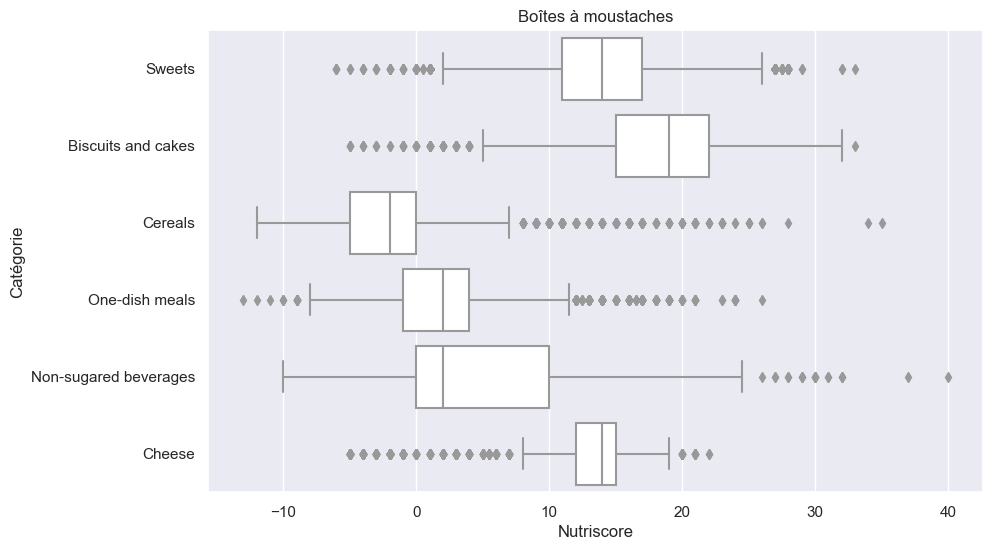

In [104]:
ax = sns.boxplot(x=Y, y=x2, data=dataANOVA, color='white', orient='h')
plt.ylabel(nomColonnes[x2])
plt.xticks(rotation=0)
plt.xlabel(nomColonnes[Y])
plt.title('Boîtes à moustaches')
plt.show()

In [105]:
Ytmp = y
if Y == 'nutrition-score-fr_100g':
    Ytmp = 'nutriscore'

anova_variete_phyto = smf.ols('{}~{}*{}'.format(Ytmp, x1, x2), data=dataANOVA).fit()
#print(anova_variete_phyto.summary())
sm.stats.anova_lm(anova_variete_phyto)

df         sum_sq        mean_sq            F  \
additives_n                 3.0  126142.007800   42047.335933  1348.757678   
categories                  5.0  969899.291326  193979.858265  6222.316287   
additives_n:categories     15.0   30430.456450    2028.697097    65.074772   
Residual                22379.0  697662.260761      31.174863          NaN   

                               PR(>F)  
additives_n              0.000000e+00  
categories               0.000000e+00  
additives_n:categories  4.164487e-194  
Residual                          NaN

In [106]:
pg.welch_anova(dv=Y, between=x1, data=dataANOVA)

Source  ddof1        ddof2          F          p-unc       np2
0  additives_n      3  4761.689429  553.11175  2.044773e-308  0.069152

In [107]:
pg.welch_anova(dv=Y, between=x2, data=dataANOVA)

Source  ddof1        ddof2            F  p-unc       np2
0  categories      5  9954.968601  7029.531327    0.0  0.599173

In [108]:
aov = pg.anova(dv=Y, between=[x1, x2], data=dataANOVA, detailed=True)

aov.round(3)

Source          SS       DF          MS         F  p-unc  \
0               additives_n    3069.639      3.0    1023.213    32.822    0.0   
1                categories  969899.291      5.0  193979.858  6222.316    0.0   
2  additives_n * categories   30430.456     15.0    2028.697    65.075    0.0   
3                  Residual  697662.261  22379.0      31.175       NaN    NaN   

     np2  
0  0.004  
1  0.582  
2  0.042  
3    NaN